# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
"""lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)"""
#1500 seems a bit excessive while we are trying to make it work
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 76


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?" 
# 
#full_url = base_url + {city name} + "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities): #enumerate add's list order to list item
    print(city)
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "q="+ city + "&appid=" + weather_api_key
    response = requests.get(city_url).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
port-aux-francais
Processing Record 1 of Set 1 | port-aux-francais
edinburgh of the seven seas
Processing Record 2 of Set 1 | edinburgh of the seven seas
yelizovo
Processing Record 3 of Set 1 | yelizovo
hermanus
Processing Record 4 of Set 1 | hermanus
fortuna
Processing Record 5 of Set 1 | fortuna
vera
Processing Record 6 of Set 1 | vera
puerto natales
Processing Record 7 of Set 1 | puerto natales
mil'kovo
Processing Record 8 of Set 1 | mil'kovo
sitka
Processing Record 9 of Set 1 | sitka
longyearbyen
Processing Record 10 of Set 1 | longyearbyen
blackmans bay
Processing Record 11 of Set 1 | blackmans bay
pimentel
Processing Record 12 of Set 1 | pimentel
ulsteinvik
Processing Record 13 of Set 1 | ulsteinvik
west island
Processing Record 14 of Set 1 | west island
iqaluit
Processing Record 15 of Set 1 | iqaluit
antonio enes
Processing Record 16 of Set 1 | antonio enes
catia la mar
Processing Record 17 of Set 1 | catia la mar
qaqor

city_url = base_url + "q="+ "houston" + "&appid=" + weather_api_key
response = requests.get(city_url).json()
response

data gathering

response["weather"][0]["main"]
response["coord"]["lon"]
response["wind"]["speed"]
response["sys"]["country"]
response["dt"]

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          74
Lat           74
Lng           74
Max Temp      74
Humidity      74
Cloudiness    74
Wind Speed    74
Country       74
Date          74
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.10,86,100,9.00,TF,1738452176
1,edinburgh of the seven seas,-37.0676,-12.3116,290.94,92,92,6.44,SH,1738452255
2,yelizovo,53.1873,158.3805,262.23,52,0,1.00,RU,1738452256
3,hermanus,-34.4187,19.2345,292.48,81,22,1.65,ZA,1738452171
4,fortuna,40.5982,-124.1573,285.66,98,75,0.00,US,1738452259


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.10,86,100,9.00,TF,1738452176
1,edinburgh of the seven seas,-37.0676,-12.3116,290.94,92,92,6.44,SH,1738452255
2,yelizovo,53.1873,158.3805,262.23,52,0,1.00,RU,1738452256
3,hermanus,-34.4187,19.2345,292.48,81,22,1.65,ZA,1738452171
4,fortuna,40.5982,-124.1573,285.66,98,75,0.00,US,1738452259


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

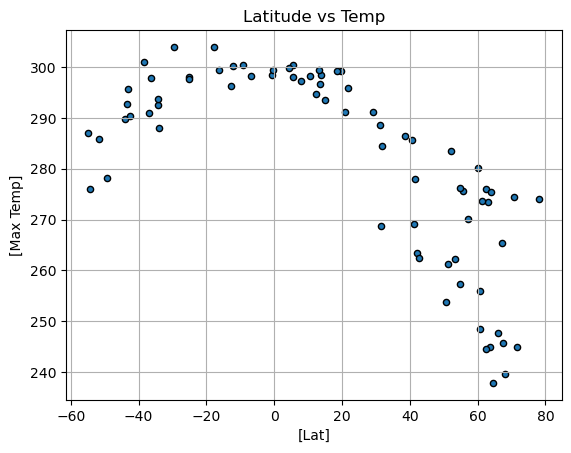

In [31]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Max Temp"],
                         marker = "o", edgecolors= "black",)

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

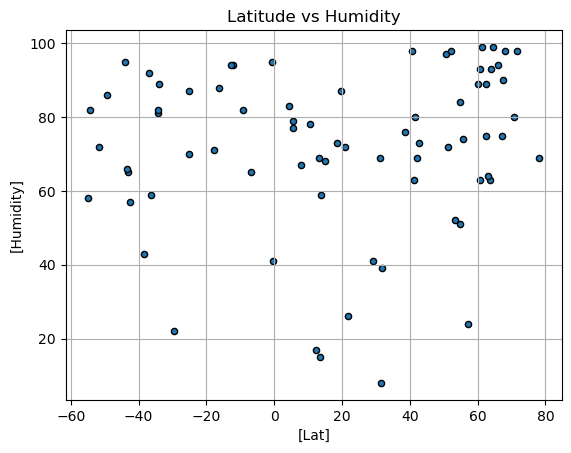

In [30]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Humidity"],
                         marker = "o", edgecolors= "black")

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

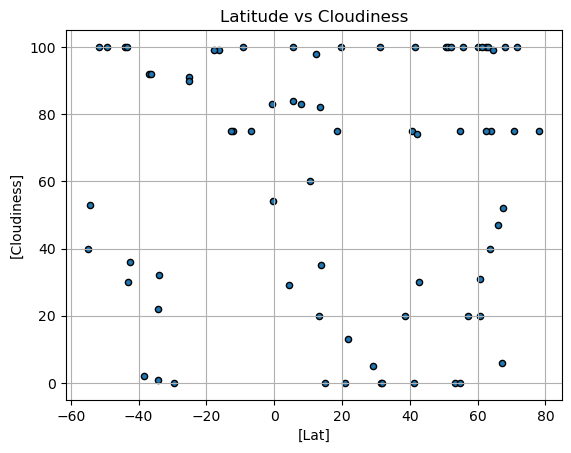

In [32]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Cloudiness"],
                         marker = "o", edgecolors= "black")

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

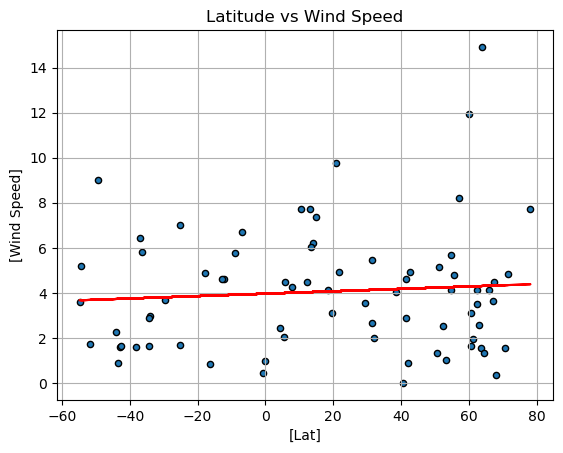

In [39]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
# Largely repurposed code from module 5 challenge 
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f}")
    plt.text( np.mean(x),np.mean(y), f"y = {slope:.2f}x + {intercept:.2f}", fontsize=12, color="red")
    print(f"The r^2 value is {rvalue**2}") #r^2
    

    

### Example of function

city_data_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(city_data_df["Lat"],city_data_df["Wind Speed"])

plt.grid()
plt.title("Latitude vs Wind Speed")

plt.savefig("output_data/Fig1.png")

plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data 
northern_hemi_df["Lat"].min() #ensureing proper df creation
northern_hemi_df.shape
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yelizovo,53.1873,158.3805,262.23,52,0,1.00,RU,1738452256
4,fortuna,40.5982,-124.1573,285.66,98,75,0.00,US,1738452259
7,mil'kovo,55.6078,37.7956,275.56,74,100,4.78,RU,1738452262
8,sitka,57.0531,-135.3300,270.09,24,20,8.23,US,1738452263
9,longyearbyen,78.2186,15.6401,274.06,69,75,7.72,SJ,1738452193


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df["Lat"].max() #ensureing proper df creation
southern_hemi_df.shape
southern_hemi_df.head()

-0.2167

###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.6707761381646125


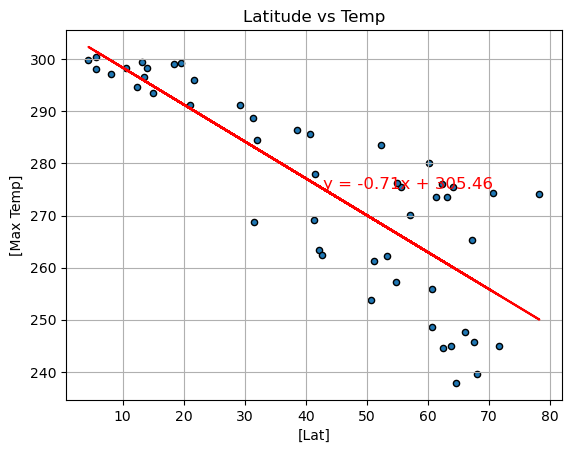

In [65]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Max Temp"],
                         marker = "o", edgecolors= "black",)
linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Temp")

# Save the figure
plt.savefig("output_data/Fig1_n.png")

# Show plot
plt.show()

The r^2 value is 0.5222813194164101


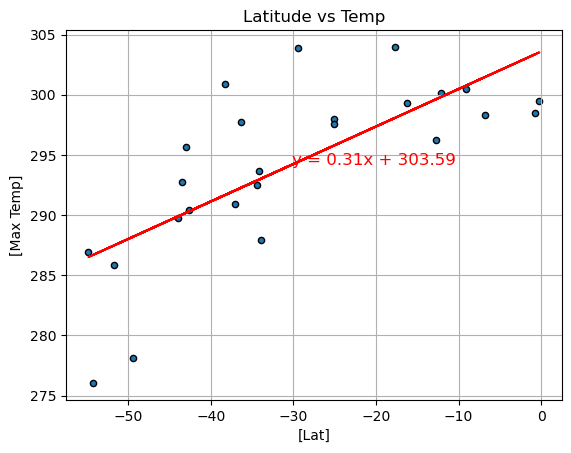

In [66]:
# Linear regression on southern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Max Temp"],
                         marker = "o", edgecolors= "black",)
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Temp")

# Save the figure
plt.savefig("output_data/Fig1_s.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.13910081983467068


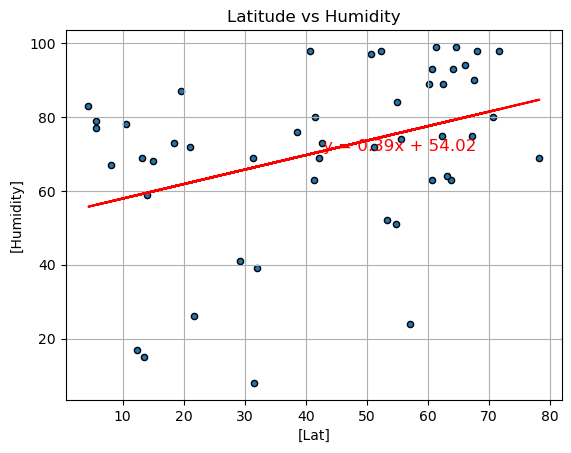

In [68]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Humidity"],
                         marker = "o", edgecolors= "black")
linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2_n.png")

# Show plot
plt.show()

The r^2 value is 0.008963547192438989


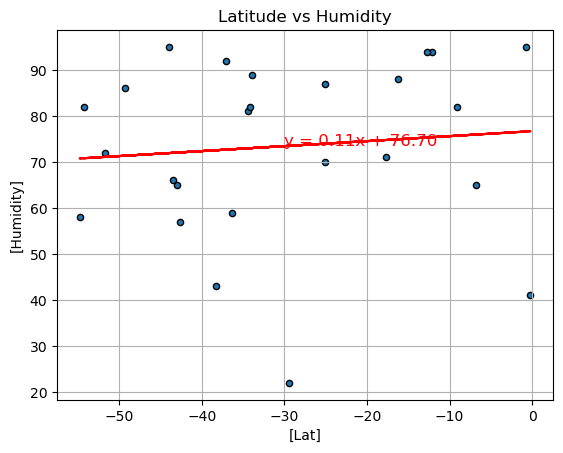

In [69]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Humidity"],
                         marker = "o", edgecolors= "black")
linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2_s.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.024967246175980257


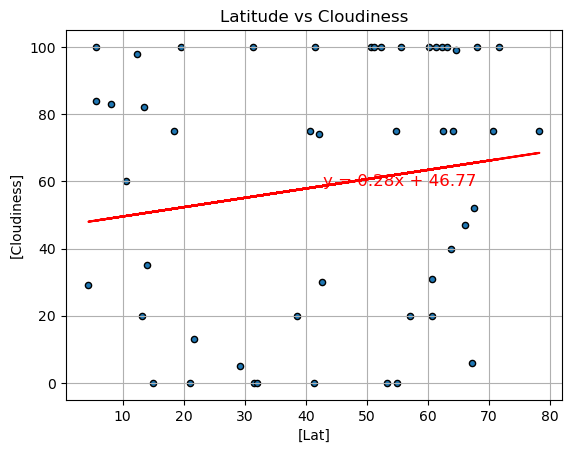

In [70]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Cloudiness"],
                         marker = "o", edgecolors= "black")
linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3_n.png")

# Show plot
plt.show()

The r^2 value is 0.03628672695793671


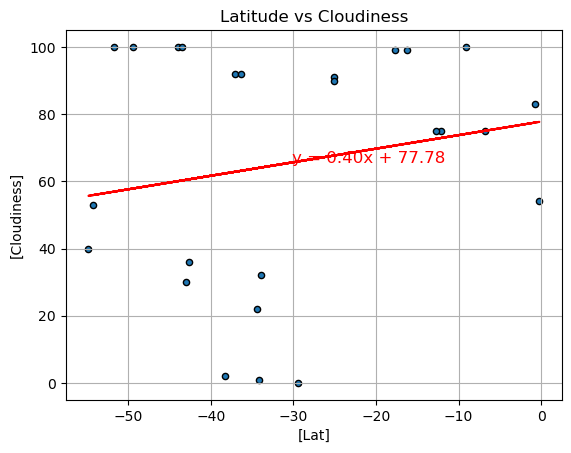

In [71]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Cloudiness"],
                         marker = "o", edgecolors= "black")
linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3_s.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.008331567568346432


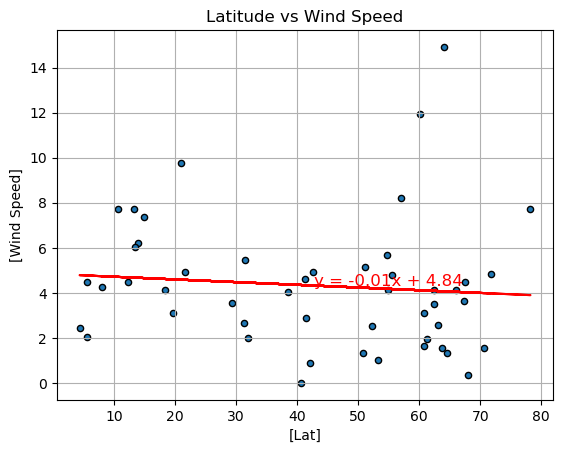

In [72]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4_n.png")

# Show plot
plt.show()

The r^2 value is 0.0010359345328563763


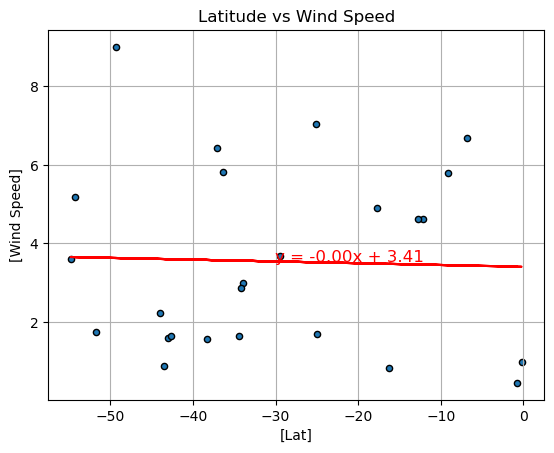

In [73]:
# Linear regression on Northern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4_s.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE